In [2]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

Lienard = lm.Lienard
VanDerPol = lm.VanDerPol


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si
from mpl_toolkits import mplot3d
import progressbar
import warnings
warnings.filterwarnings("ignore") 

In [4]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x-y))

In [5]:
def ivp_vdp(y, t, mu, a, omega):
    return [
        y[1],
        mu*(1-y[0]**2)*y[1] - y[0] + a*np.cos(omega*t)
    ]

## Maps Comparison

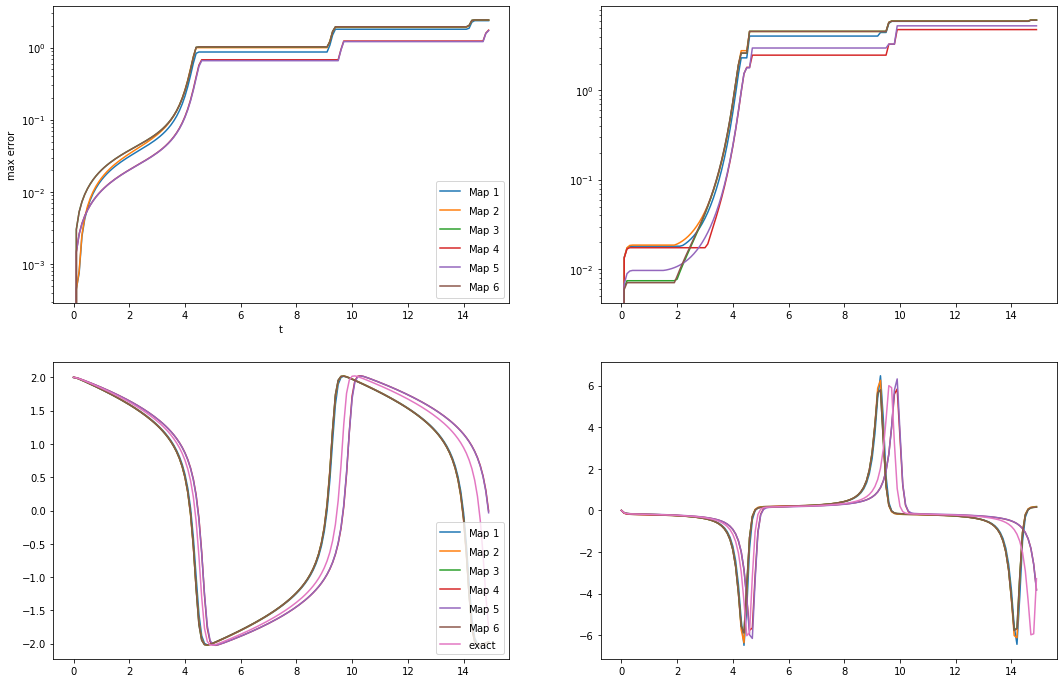

In [41]:
tf = 15
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
i=1
for j in li.mappers:
    sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[j,j])
    errq=err(sol[:,1],y_odeint[:, 0])
    errs=err(sols, y_odeint[:, 1])
    plt.subplot(221)
    plt.xlabel("t")
    plt.ylabel("max error")
    plt.plot(tspan,errq,label=f"Map ${i}$")
    plt.yscale('log')
    plt.legend(loc='lower right')
    plt.subplot(222)
    plt.plot(tspan,errs,label=f"Map ${i}$")
    plt.yscale('log')
    plt.subplot(223)
    plt.plot(tspan,sol[:,1],label=f"Map ${i}$")
    plt.legend(loc='lower right')
    plt.subplot(224)
    plt.plot(tspan,sols,label=f";ap ${i}$")
    i+=1

plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()

## Multiple Maps comparison

1 2 1.865396811723957 5.953232564492525 7.818629376216482
1 3 2.0132099607691747 5.998688038438111 8.011897999207285
1 4 0.7167426246576835 3.313179705471362 4.029922330129046
1 5 0.5608356139794545 2.461960576518702 3.0227961904981564
1 6 2.012525486269223 5.998485678221279 8.011011164490501
2 1 1.8586275641667624 5.950134726988156 7.808762291154919
2 3 2.087020129760919 6.028954617188151 8.115974746949071
2 4 0.45717318677937346 2.0444931603526855 2.501666347132059
2 5 0.6383242293387393 2.859119653915553 3.4974438832542925
2 6 2.086628200274498 6.028843321235356 8.115471521509853
3 1 1.5547446617268719 5.633459500957649 7.188204162684521
3 2 1.5119377171449946 5.570145134713991 7.082082851858986
3 4 0.6908227492205571 3.1321541269576 3.822976876178157
3 5 0.905759449887051 4.118894819391613 5.024654269278664
3 6 1.9464540434099953 5.940552392898 7.8870064363079955
4 1 0.30377954554543773 1.5338022063479522 1.83758175189339
4 2 0.6735840750640768 3.0428461852525914 3.716430260316668


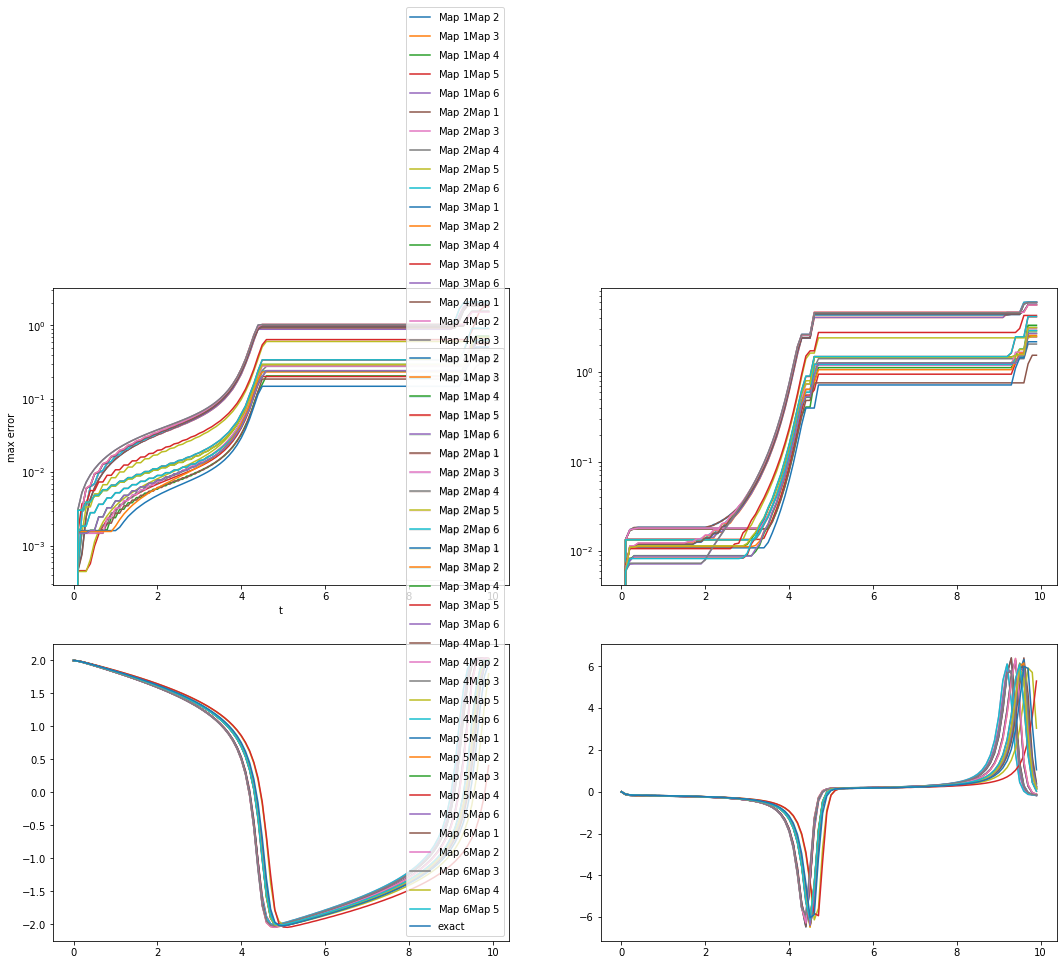

In [36]:
tf = 10
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
k0=1
for i in li.mappers:
    k1=1
    for j in li.mappers:
        if k1==0:
            k1=1
        if k0==0:
            k0=1
        if i!=j:
            sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[i,j])
            errq=err(sol[:,1],y_odeint[:, 0])
            errs=err(sols, y_odeint[:, 1])
            plt.subplot(221)
            plt.xlabel("t")
            plt.ylabel("max error")
            plt.plot(tspan,errq,label=f"Map ${k0}$" f"Map ${k1}$")
            plt.yscale('log')
            plt.legend(loc='lower right')
            plt.subplot(222)
            plt.plot(tspan,errs,label=f"Map ${k0}$" f"Map ${k1}$")
            plt.yscale('log')
            plt.subplot(223)
            plt.plot(tspan,sol[:,1],label=f"Map ${k0}$" f"Map ${k1}$")
            plt.legend(loc='lower right')
            plt.subplot(224)
            plt.plot(tspan,sols,label=f"Map ${k0}$" f"Map ${k1}$")
            print(k0,k1,errq[len(errq)-1],errs[len(errs)-1],errq[len(errq)-1]+errs[len(errs)-1])
        k1=((k1+1)%7)
    k0=((k0+1)%7)

plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()

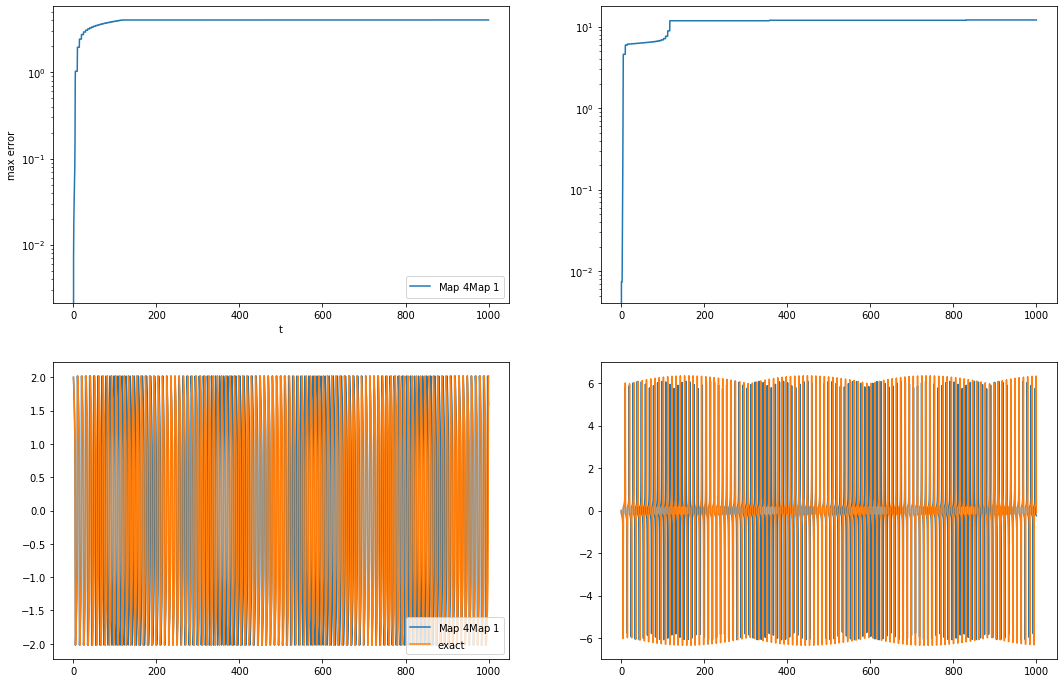

In [40]:
tf = 1000
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
k0=4
k1=1
sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[li.mappers[k0+1],li.mappers[k1+1]])
errq=err(sol[:,1],y_odeint[:, 0])
errs=err(sols, y_odeint[:, 1])
plt.subplot(221)
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,errq,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.legend(loc='lower right')
plt.subplot(222)
plt.plot(tspan,errs,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.subplot(223)
plt.plot(tspan,sol[:,1],label=f"Map ${k0}$" f"Map ${k1}$")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,sols,label=f"Map ${k0}$" f"Map ${k1}$")
plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()